In [4]:
from gbm_drm_gen.drmgen import DRMGen
from gbmgeometry.position_interpolator import PositionInterpolator
import numpy as np
# Input energy bin edges for the response - need odd number of edges!
Ein_edges = np.geomspace(10,2000,301)

# Output energy bin edges for the response
Eout_edges = np.geomspace(10,1000,100)

# need a PositionInterpolator to init the DRMGen. The values I use here define the satellite position and orientation but I
# just use dummy values here as we will calc the response directly in satellite frame
pos = PositionInterpolator(quats = np.array([[0,0,0,0],[0,0,0,0]]),
                           sc_pos = np.array([[0,0,0],[0,0,0]]),
                           time=[0,10],
                           trigtime=5)

# Init the response generator
# mat_type defines what is included in the response. 0 means only take the direct response and not the additional response of gamma rays
# that get reflected from the earth
# occult=False means we do not want to account for the occultation of the location by the earth
# det_number 0 is detector n0
drmgen = DRMGen(pos, det_number=0, ebin_edge_in=Ein_edges, ebin_edge_out=Eout_edges, mat_type=0, occult=False,time=5)

In [5]:
# set the position (in sat frame)
drmgen.set_location_direct_sat_coord(az=0, el=0)

In [12]:
# get the response matrix
mat = drmgen.matrix

Text(0.5, 1.0, 'Input: 58.48035476425734 keV')

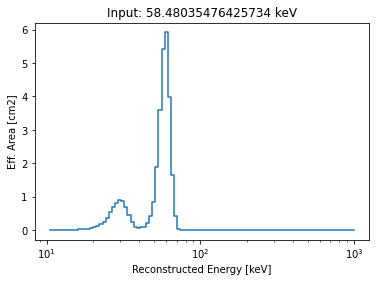

In [13]:
# plot one row
import matplotlib.pyplot as plt
Ein_index = 100
plt.step(Eout_edges[1:], mat[:,Ein_index])
plt.xscale("log")
plt.ylabel("Eff. Area [cm2]")
plt.xlabel("Reconstructed Energy [keV]")
plt.title(f"Input: {Ein_edges[Ein_index]} keV")